**Data Scientist-Ahmet Zafer SAGLIK**


# Introduction 
The objective of this project is to predict the purchasing decision of policyholders for the car insurance product.
About Dataset
Data source: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

Kaggle Data Usability:10.0 

## Background 
In this dataset, we have the features about policyholder regarding demographics (gender, age, driving license, region code type), Vehicles (Vehicle Age, Damage), Policy (id, previously insured, premium, sourcing channel, vintage), etc. Target will be the response of the policy holders (0 or 1) concerning the purchase of the car insurance. Above mentioned features will be used to predict the response (target) of the policy holders.
## Project Introduction
Since the insurance companies are making profit from risk-pooling. They need to reach out to as many as people via the correct channels that will catalyze them to buy the insurance products (Car insurance). Given the fact that most of the insurance companies have or request detailed information about their current customers, it puts them in an advantageous position regarding the potential use of big data. In this project, I will apply machine learning algorithms for an insurance company who wants to reach out to more target customers.



## Implementation Steps



1) Loading of the packages and Reading Into Data

2) Data Visualization/Data Transformation

3) Training Model

4) Model Selection 

5) Parameter Tuning/ Optimization



## Information about columns:

id - Unique ID for the customer

Gender - Gender of the customer

Age - Age of the customer

Driving_License - 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code - Unique code for the region of the customer

Previously_Insured - 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
Vehicle_Age - Age of the Vehicle

Vehicle_Damage - 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium - The amount customer needs to pay as premium in the year

PolicySalesChannel - Anonymized Code for the channel of outreaching to the customer ie.,Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage - Number of Days, Customer has been associated with the company

Response - 1 : Customer is interested, 0 : Customer is not interested

# 1. Loading of the packages and Reading Into Data

In [ ]:
## Uploading the necessary libraries that will help to make data loading, transformation and visualization

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
# from statistics import mean
import warnings; warnings.filterwarnings("ignore")


# 2) Data Visualization/Data Transformation,

In [ ]:
df = pd.read_csv('train.csv')


In [ ]:

df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [ ]:
# To check that our replace function worked properly on the dataset
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
# Regarding that we should not have any null value in our dataset to maximize the precision, an overall check of the features is done concerning the null-values. 
# Dataset has no null-values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# List of dropped columns that are not necessary for our task
drop_columns = ["id","Region_Code"]

df = df.drop(drop_columns, axis=1)

print(df.head())

   Gender  Age  Driving_License  Previously_Insured Vehicle_Age  \
0    Male   44                1                   0   > 2 Years   
1    Male   76                1                   0    1-2 Year   
2    Male   47                1                   0   > 2 Years   
3    Male   21                1                   1    < 1 Year   
4  Female   29                1                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0  


In [ ]:
## This table gives us descriptive statistics of the dataset. 
## We can already see that population is relatively young and we have outliers as seen in the high stdeviation result
## Most of the policy holders has a driving licence, derived from the mean value of Driving_Licence Column.
df.describe()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


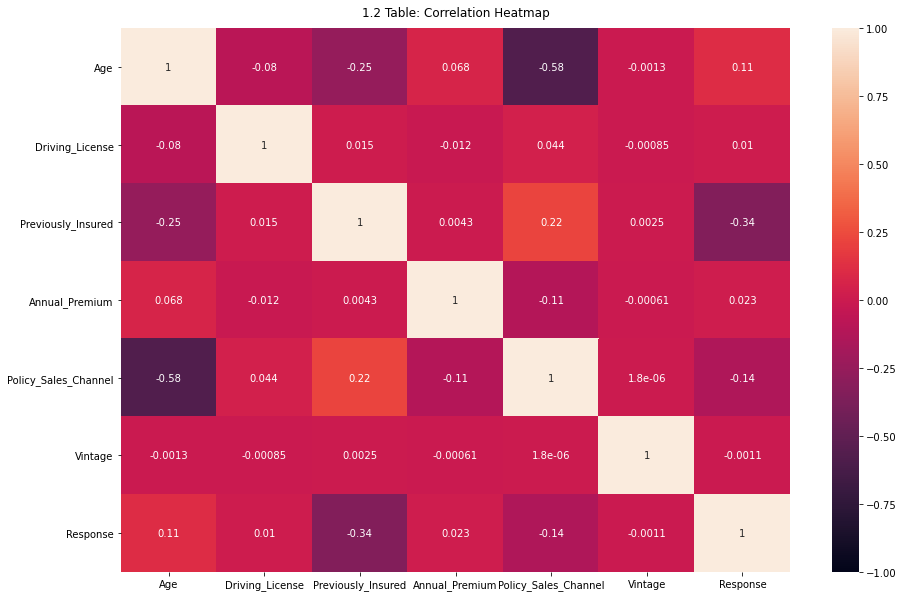

In [ ]:
## The heatmap below visualizes the correlation between the data features. 
## There are 3 important features that has relatively higher positive or negative correlation with the response feature; 
## Age, Previously Insured, Policy_Sales_Channel. 
## I will focus on these features in the visualizations.


plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('1.2 Table: Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

<AxesSubplot:xlabel='Age', ylabel='Density'>

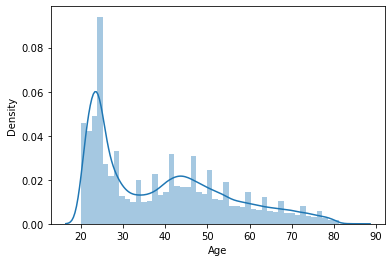

In [ ]:
#Histogram shows the distribution of the policy holders' age.
#We have a right-skewed distribution of age.
sns.distplot(df.Age)

In [ ]:
df['Age'].mean()

38.822583565331705

In [ ]:
df['Age'].median()

36.0

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

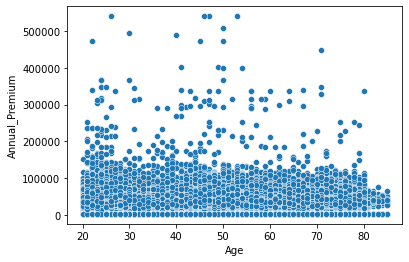

In [ ]:
## Scatter Plot of the Age and the Annual Premium

sns.scatterplot(x=df['Age'],y=df['Annual_Premium'])

In [ ]:
## Dataset is balanced in terms of gender. 
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [ ]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

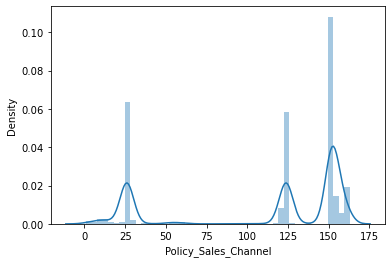

In [ ]:
# Histogram shows the distribution of the different sales channels. It seems that 152.0, 26.0 and 124.0 are the most used channels to reach out to the customer.
sns.distplot(df.Policy_Sales_Channel)

In [ ]:
## There are 3 channels that dominate the communication way of the insurance company with its clients.
df['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
143.0         1
43.0          1
41.0          1
84.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [ ]:
## As it is visible from the count of 0 and 1 values in Response feature (target), target is unbalanced.

df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='Density'>

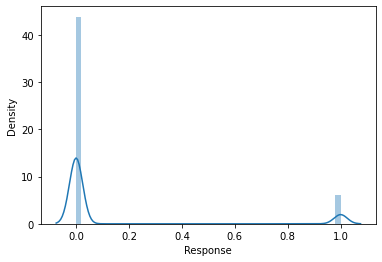

In [ ]:
sns.distplot(df.Response)

### 2.1 Under-Sampling 
Under-sampling code is quoted from Bhavesh Bhatt Undersampling for Handling Imbalanced Datasets tutorial series source:https://www.youtube.com/watch?v=Ti8SbfFecuc&t=418s

In [ ]:
# To avoid the impact of unbalanced target feature, under-sampling technieque is applied as part of re-sampling.


In [ ]:
## number of minority value ('1') in our target 
minority_class_len=len(df[df['Response'] == 1])
print(minority_class_len)

46710


In [ ]:
## number of majority value ('0') in our target
majority_class_indices=df[df['Response']== 0].index
print(majority_class_indices)

Int64Index([     1,      3,      4,      5,      6,      8,      9,     11,
                12,     13,
            ...
            381099, 381100, 381101, 381102, 381103, 381104, 381105, 381106,
            381107, 381108],
           dtype='int64', length=334399)


In [ ]:
# Making a randomized sampling from our majority target value '0' that will be equal to the number of '1' value in Target column
random_majority_indices= np.random.choice (majority_class_indices,
                                          minority_class_len,
                                          replace=False)
print(len(random_majority_indices))

46710


In [ ]:
minority_class_indices=df[df['Response']==1].index
print(minority_class_indices)

Int64Index([     0,      2,      7,     10,     15,     19,     26,     29,
                57,     69,
            ...
            380987, 380997, 381026, 381029, 381031, 381057, 381061, 381073,
            381075, 381097],
           dtype='int64', length=46710)


In [ ]:
## Concatenating two list again to convert them into dataframe.
under_sample_indices= np.concatenate([minority_class_indices,random_majority_indices])

In [ ]:
under_sample=df.loc[under_sample_indices]

In [ ]:
# New df dataframe with balanced target values
df=under_sample

In [ ]:
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,47,1,0,> 2 Years,Yes,38294.0,26.0,27,1
7,Female,56,1,0,1-2 Year,Yes,32031.0,26.0,72,1
10,Female,47,1,0,1-2 Year,Yes,47576.0,124.0,46,1
15,Male,37,1,0,1-2 Year,Yes,2630.0,156.0,147,1


In [ ]:
under_sample['Response'].value_counts()

0    46710
1    46710
Name: Response, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93420 entries, 0 to 201318
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                93420 non-null  object 
 1   Age                   93420 non-null  int64  
 2   Driving_License       93420 non-null  int64  
 3   Previously_Insured    93420 non-null  int64  
 4   Vehicle_Age           93420 non-null  object 
 5   Vehicle_Damage        93420 non-null  object 
 6   Annual_Premium        93420 non-null  float64
 7   Policy_Sales_Channel  93420 non-null  float64
 8   Vintage               93420 non-null  int64  
 9   Response              93420 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 7.8+ MB


### 2.2 Data Standardization

In [ ]:
## I seperated my target 'Response' column in y dataframe and dropping it in our main dataframe called 'df'

y=pd.DataFrame(df['Response'])
df=df.drop(columns=['Response'])

In [ ]:
# one-hot encoding (tutorial 2) 
print("Filtering Dummy Features")
dummyvariables=['Driving_License', 'Previously_Insured', 'Gender', 
              'Vehicle_Age','Vehicle_Damage']
# dropping dummy variable to exclude from standardize. 
dfdummies=pd.get_dummies(df.filter(dummyvariables))

Filtering Dummy Features


In [ ]:
## Standard scaling the numerical features to have a mean of 0 and variance of 1 after dropping dummy features
df=df.drop(columns=dummyvariables) 
df=pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns) # standardizing

In [ ]:
# To check that outliers are removed after winsorizing
print(df["Annual_Premium"].min())
print(df["Annual_Premium"].max())

-1.5942889753481007
28.591541937777855


In [ ]:
import scipy.stats as sp
for col in df.columns: 
     sp.mstats.winsorize(df[col], limits=0.01, inplace=True)
df=pd.concat([ df.reset_index(), dfdummies.reset_index()], axis=1)                     
df=df.drop(columns=['index']) 


In [ ]:
# Outliers are removed
print(df["Annual_Premium"].min())
print(df["Annual_Premium"].max())

-1.5942889753481007
2.4274934915354596


In [ ]:
print(df)

            Age  Annual_Premium  Policy_Sales_Channel   Vintage  \
0      0.228407        0.529757             -1.386256  0.749065   
1      0.437712        0.408460             -1.386256 -1.522738   
2      1.065625        0.056754             -1.386256 -0.984680   
3      0.437712        0.929700              0.367343 -1.295558   
4     -0.259970       -1.594289              0.939947 -0.087915   
...         ...             ...                   ...       ...   
93415  0.507480        0.532508              0.367343 -1.068378   
93416  0.716784        0.545480              0.904160  1.382778   
93417  1.344697        0.352641             -1.386256  1.550174   
93418 -1.306491       -0.396312              0.868372  0.880590   
93419  0.926089        0.531161              0.832584  1.526261   

       Driving_License  Previously_Insured  Gender_Female  Gender_Male  \
0                    1                   0              0            1   
1                    1                   0     

## 3. Test and Train Data

In [ ]:
X=df
y=y

In [ ]:
X

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Driving_License,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0.228407,0.529757,-1.386256,0.749065,1,0,0,1,0,0,1,0,1
1,0.437712,0.408460,-1.386256,-1.522738,1,0,0,1,0,0,1,0,1
2,1.065625,0.056754,-1.386256,-0.984680,1,0,1,0,1,0,0,0,1
3,0.437712,0.929700,0.367343,-1.295558,1,0,1,0,1,0,0,0,1
4,-0.259970,-1.594289,0.939947,-0.087915,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93415,0.507480,0.532508,0.367343,-1.068378,1,0,0,1,1,0,0,0,1
93416,0.716784,0.545480,0.904160,1.382778,1,0,0,1,0,0,1,0,1
93417,1.344697,0.352641,-1.386256,1.550174,1,0,0,1,1,0,0,0,1
93418,-1.306491,-0.396312,0.868372,0.880590,1,1,1,0,0,1,0,1,0


In [ ]:
y

,Response
0,1
2,1
7,1
10,1
15,1
...,...
360878,0
102809,0
205738,0
375429,0


In [ ]:
##I have splitted the data into two parts for training and testing. Testing is %20 of the training dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y,random_state = 1)

In [ ]:
X_train

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Driving_License,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
45320,-0.120433,0.056530,0.367343,-0.936852,1,0,0,1,0,0,1,0,1
24430,0.158639,0.311029,-1.386256,-1.044464,1,0,1,0,1,0,0,0,1
70405,-1.376259,0.456866,0.868372,1.418649,1,1,1,0,0,1,0,0,1
13982,-0.748346,0.491346,0.367343,-0.075958,1,0,0,1,1,0,0,0,1
9756,0.507480,-0.213244,-1.386256,-1.546652,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82676,2.460987,0.080677,0.367343,-1.343385,1,1,0,1,1,0,0,1,0
42238,0.158639,0.904654,0.367343,1.550174,1,0,0,1,1,0,0,0,1
14918,0.158639,-1.594289,0.367343,1.047986,1,0,0,1,1,0,0,0,1
72479,-1.166955,0.621123,0.868372,-0.602060,1,1,1,0,0,1,0,1,0


In [ ]:
X_test

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Driving_License,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
53354,0.158639,-1.594289,-1.386256,0.497971,1,0,0,1,1,0,0,0,1
3362,-1.376259,-0.453142,0.868372,0.127308,1,0,1,0,0,1,0,0,1
56958,-0.957651,-1.594289,0.868372,-0.554233,1,1,0,1,0,1,0,1,0
50548,0.786552,-0.328644,-1.386256,0.665367,1,1,0,1,1,0,0,1,0
37851,2.391219,-1.594289,-1.386256,-0.315096,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26847,0.926089,0.506003,-1.386256,0.342532,1,0,0,1,1,0,0,0,1
49167,-1.027419,-0.152258,0.868372,0.964288,1,1,1,0,0,1,0,1,0
54992,2.181915,-1.594289,-1.386256,-1.283601,1,1,1,0,1,0,0,1,0
86991,1.902842,-1.594289,0.367343,0.904504,1,1,0,1,1,0,0,1,0


In [ ]:
X_train[:1]

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Driving_License,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
45320,-0.120433,0.05653,0.367343,-0.936852,1,0,0,1,0,0,1,0,1


## 4. Model Selection
        
        
##     4.1 Decision Tree Classifier

In [ ]:
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7163883536715907
F1: 0.7158865476381965
Recall: 0.7146221365874545
Precision: 0.7171554409711033


## 4.2 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

# Dashboard for the model performance
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7822736030828517
F1: 0.8172999191592561
Recall: 0.9739884393063584
Precision: 0.7040389972144847


## 4.3 Random Forest Model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
rdf.fit(X_train,y_train)
y_pred = rdf.predict(X_test)

# Dashboard for the model performance
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))


Accuracy: 0.7684649967886962
F1: 0.7819995968554726
Recall: 0.8305502033825733
Precision: 0.7388116549228718


In [ ]:
# Confusion matrix gives an overview about performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
print(metrics.classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75      9342
           1       0.74      0.83      0.78      9342

    accuracy                           0.77     18684
   macro avg       0.77      0.77      0.77     18684
weighted avg       0.77      0.77      0.77     18684



0.7684649967886962

In [ ]:
from sklearn.model_selection import cross_val_score
dt=RandomForestClassifier()
crossval=cross_val_score(dt,X,y,cv=5)
print(crossval)
np.mean(crossval)

[0.77842004 0.7798116  0.7729073  0.77847356 0.77617213]


0.7771569257118391

## 4.4 K-nearest neighbors Classifier model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Dashboard for the model performance
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.763380432455577
F1: 0.7801044516289479
Recall: 0.8394348105330764
Precision: 0.7286072656322586


## 5) Parameter Tuning/ Optimization
Randomizedsearch/ Optimization is quoted from the following kaggle link
source: https://www.kaggle.com/funxexcel/p3-random-forest-tuning-randomizedsearchcv

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]



In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [ ]:
rf_RandomGrid.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.796
Test Accuracy - : 0.798


## Deep Learning-Keras Binary Classification unsing Sequential Layers

In [ ]:
X_train,y_train, X_test, y_test

(            Age  Annual_Premium  Policy_Sales_Channel   Vintage  \
 45320 -0.120433        0.056530              0.367343 -0.936852   
 24430  0.158639        0.311029             -1.386256 -1.044464   
 70405 -1.376259        0.456866              0.868372  1.418649   
 13982 -0.748346        0.491346              0.367343 -0.075958   
 9756   0.507480       -0.213244             -1.386256 -1.546652   
 ...         ...             ...                   ...       ...   
 82676  2.460987        0.080677              0.367343 -1.343385   
 42238  0.158639        0.904654              0.367343  1.550174   
 14918  0.158639       -1.594289              0.367343  1.047986   
 72479 -1.166955        0.621123              0.868372 -0.602060   
 38320  0.298175        0.372688              0.367343  1.526261   
 
        Driving_License  Previously_Insured  Gender_Female  Gender_Male  \
 45320                1                   0              0            1   
 24430                1         

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# sequential model is used
model = Sequential()

# adding first input layer and hidden layer
model.add(Dense(5, activation='relu', input_dim=13))
# drop out will make some of the nodes hidden - which increase the model accuracy
model.add(Dropout(0.2))
model.add(Dense(5,activation='relu'))
# last layer - as this is classification problem, sigmoid will output probabilities
model.add(Dense(1, activation='sigmoid'))

# binary classification will squash probabilities between 0 and 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# training model
model.fit(X_train, y_train,epochs=30)

Epoch 1/30
2336/2336 [==============================] - 2s 613us/step - loss: 0.5511 - accuracy: 0.7014
Epoch 2/30
2336/2336 [==============================] - 1s 612us/step - loss: 0.4764 - accuracy: 0.7765
Epoch 3/30
2336/2336 [==============================] - 1s 580us/step - loss: 0.4744 - accuracy: 0.7764
Epoch 4/30
2336/2336 [==============================] - 1s 536us/step - loss: 0.4672 - accuracy: 0.7788
Epoch 5/30
2336/2336 [==============================] - 1s 578us/step - loss: 0.4516 - accuracy: 0.7837
Epoch 6/30
2336/2336 [==============================] - 1s 565us/step - loss: 0.4493 - accuracy: 0.7798
Epoch 7/30
2336/2336 [==============================] - 1s 578us/step - loss: 0.4475 - accuracy: 0.7788
Epoch 8/30
2336/2336 [==============================] - 2s 671us/step - loss: 0.4495 - accuracy: 0.7762
Epoch 9/30
2336/2336 [==============================] - 2s 756us/step - loss: 0.4515 - accuracy: 0.7775
Epoch 10/30
2336/2336 [==============================] - 2s 668u

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
# flatting the output prediction
y_pred = y_pred.reshape(1, -1)[0]

In [ ]:
y_test['Prediction'] = y_pred

In [ ]:
y_test['Result'] = y_test['Response'] == y_test['Prediction']

In [ ]:
# calculating accuracy
acc = y_test['Result'].value_counts()[True] / len(y_test)
print(acc)

0.7964568614857632


## ----- The End of the Project-----